In [29]:
import pandas as pd
import datetime as dt
from datetime import timedelta
import numpy as np
import matplotlib.pyplot as plt

# Examine Sales Data

In [30]:
#read the data with parsing Date field
sales=pd.read_csv("~/Desktop/REPL_ML_Exercise/training_Sales.csv",parse_dates=['Date'])

In [31]:
#Examine the head of data
sales.head()

#The Date field is a timestamp field with recording every 15 minutes

,Date,Value
0,2013-11-07 13:00:00,830
1,2013-11-07 13:15:00,885
2,2013-11-07 13:30:00,938
3,2013-11-07 13:45:00,804
4,2013-11-07 14:00:00,793


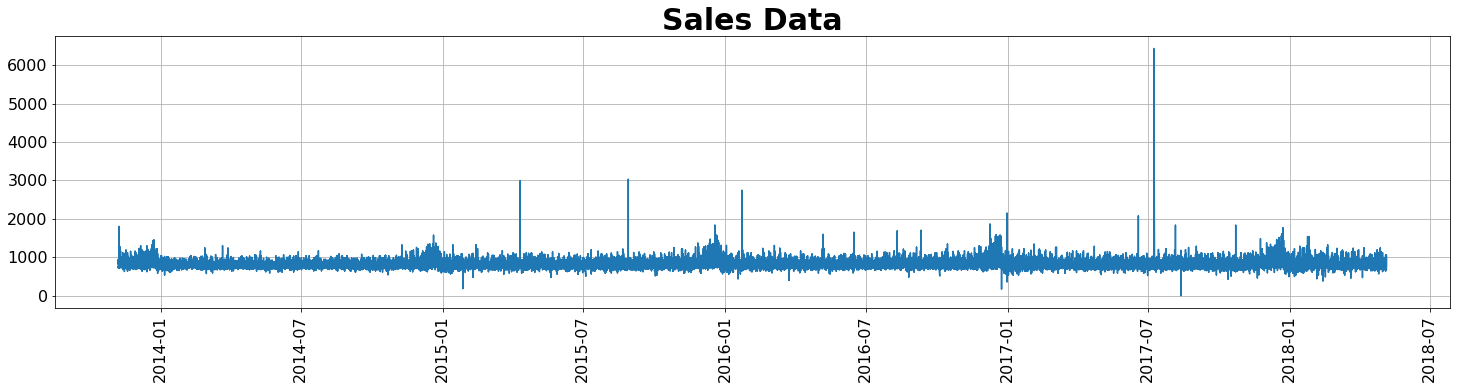

In [32]:
#visualize sales
from pandas.plotting import register_matplotlib_converters
fig= plt.figure(figsize=(25,5))
plt.plot(sales['Date'].dt.date,sales['Value'])
plt.title("Sales Data",fontsize=30 ,weight='bold')
plt.xticks(fontsize=16, rotation=90)
plt.yticks(fontsize=16)
plt.grid()
plt.show()

#Inference: We can see the Sales has seasonal increase in the month of decemeber and there are some outliers.

In [33]:
#check for missing data
sales.isnull().sum()

Date     0
Value    0
dtype: int64

In [34]:
#pick unqiue dates from sales and create a Dataframe
unique_sales_dates=pd.DataFrame(sales['Date'].dt.date.unique())

In [35]:
unique_sales_dates.columns=['Date']
unique_sales_dates['Date']=pd.to_datetime(unique_sales_dates['Date'], errors='coerce')

In [36]:
#Assign first unique date to previous field
previous=unique_sales_dates['Date'][0]
previous

Timestamp('2013-11-07 00:00:00')

In [37]:
#function to find missing dates

def missing(data,start,stop,increase,previous):
    missing_list=[]
    for i in range(start, stop, increase):
        
        if (data['Date'][i] == (previous+timedelta(days=1))):
            previous=previous+timedelta(days=1)
            
        else:
            print("Missing Date: ",data['Date'][i]+timedelta(days=-1))
            previous=previous+timedelta(days=2)
            missing_list.append(data['Date'][i]+timedelta(days=-1))
    
    return missing_list
       



In [38]:
missing_dates_list=missing(unique_sales_dates,1,len(unique_sales_dates),1,previous)
previous=unique_sales_dates['Date'][0]
print("Number of dates missing: ",len(missing_dates_list))

# The dates in the month of March and April is Easter
# The dates in the month of November is Thanksgiving
# The dates in the month of December is Christmas

Missing Date:  2013-11-28 00:00:00
Missing Date:  2013-12-25 00:00:00
Missing Date:  2013-12-31 00:00:00
Missing Date:  2014-04-20 00:00:00
Missing Date:  2014-04-30 00:00:00
Missing Date:  2014-08-31 00:00:00
Missing Date:  2014-11-27 00:00:00
Missing Date:  2014-12-25 00:00:00
Missing Date:  2014-12-31 00:00:00
Missing Date:  2015-04-05 00:00:00
Missing Date:  2015-11-26 00:00:00
Missing Date:  2015-12-25 00:00:00
Missing Date:  2016-03-27 00:00:00
Missing Date:  2016-11-24 00:00:00
Missing Date:  2016-12-25 00:00:00
Missing Date:  2017-04-16 00:00:00
Missing Date:  2017-11-23 00:00:00
Missing Date:  2017-12-25 00:00:00
Missing Date:  2018-04-01 00:00:00
Number of dates missing:  19


In [39]:
#Missing days are holidays and hence no sales. So, value of 0 is inserted for those days.
missing_sales_dates=pd.DataFrame({'Date':missing_dates_list,
                        'Value':0})
missing_sales_dates['Date']=pd.to_datetime(missing_sales_dates['Date'], errors='coerce')

In [40]:
newsales=pd.concat([sales,missing_sales_dates],axis=0)

In [41]:
newsales=newsales.reset_index(inplace=False)

In [42]:
newsales=newsales.sort_values('Date')
newsales=newsales.drop(['index'],axis=1)


In [43]:
#There are 1642 days between 2013-11-07 to 2018-05-06
newsales['Date'].dt.date.unique().shape

(1642,)

# Examine Traffic Data

In [44]:
#read the data with parsing Date field
traffic=pd.read_csv("~/Desktop/REPL_ML_Exercise/training_Traffic.csv",parse_dates=['Date'])
traffic.shape

(58437, 2)

In [45]:
#check for missing data
traffic.isnull().sum()

Date     0
Value    0
dtype: int64

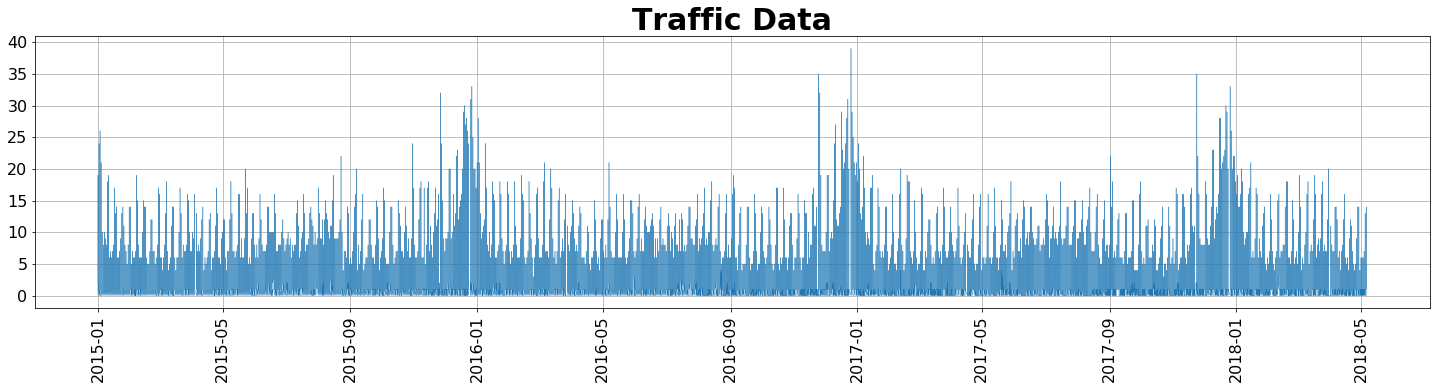

In [46]:
#visualize Traffic
fig= plt.figure(figsize=(25,5))
plt.plot(traffic['Date'].dt.date,traffic['Value'],linewidth=0.4)
plt.title("Traffic Data",fontsize=30 ,weight='bold')
plt.xticks(fontsize=16, rotation=90)
plt.yticks(fontsize=16)
plt.grid()
plt.show()

#Inference: We can see the Traffic also has seasonal increase in the month of decemeber and there are some outliers. 
#As an average we can see most of the daya there were atleast 5 customers.

In [47]:
#pick unqiue dates from traffic
unique_traffic_dates=pd.DataFrame(traffic['Date'].dt.date.unique())
unique_traffic_dates.columns=['Date']
unique_traffic_dates['Date']=pd.to_datetime(unique_traffic_dates['Date'], errors='coerce')

In [48]:
previous=unique_traffic_dates['Date'][0]
previous

Timestamp('2015-01-01 00:00:00')

In [49]:
missing_traffic_list=missing(unique_traffic_dates,1,len(unique_traffic_dates),1,previous)
previous=unique_traffic_dates['Date'][0]


Missing Date:  2015-04-05 00:00:00
Missing Date:  2015-12-25 00:00:00
Missing Date:  2016-03-27 00:00:00
Missing Date:  2016-12-25 00:00:00
Missing Date:  2017-04-16 00:00:00
Missing Date:  2017-12-25 00:00:00
Missing Date:  2018-04-01 00:00:00


In [50]:
#Missing days are holidays and hence no traffic. So, value of 0 is inserted for those days.
missing_traffic_dates=pd.DataFrame({'Date':missing_traffic_list,
                        'Value':0})
missing_traffic_dates['Date']=pd.to_datetime(missing_traffic_dates['Date'], errors='coerce')


In [51]:
newtraffic=pd.concat([traffic,missing_traffic_dates],axis=0)

In [52]:
newtraffic=newtraffic.reset_index(inplace=False)

In [53]:
newtraffic=newtraffic.sort_values('Date')
newtraffic=newtraffic.drop(['index'],axis=1)

In [54]:
#There are 1222 days between 2015-01-01 to 2018-05-06
newtraffic['Date'].dt.date.unique().shape

(1222,)

# Explanatory Data Analysis

In [55]:
#grouping sales data by Date
sales_eda=(newsales.groupby(newsales['Date'].dt.date).sum()).reset_index()
sales_eda['Date']=pd.to_datetime(sales_eda['Date'], errors='coerce')

In [56]:
#grouping traffic data by Date
traffic_eda=(traffic.groupby(traffic['Date'].dt.date).sum()).reset_index()
traffic_eda['Date']=pd.to_datetime(traffic_eda['Date'], errors='coerce')

In [57]:
#Function to extract day of week,month,date, year from date field
def convert_date(df):
    
    df['Week_day']=df['Date'].dt.dayofweek
    df['Month']=df['Date'].dt.month
    df['Day']=df['Date'].dt.day
    df['Year']=df['Date'].dt.year
    

convert_date(sales_eda)
convert_date(traffic_eda)

In [58]:
#Renaming columns
sales_eda.columns=['Date','Sales','Week_day','Month','Day','Year']
traffic_eda.columns=['Date','Traffic','Week_day','Month','Day','Year']

# Is there a relationship between Sales and Traffic?

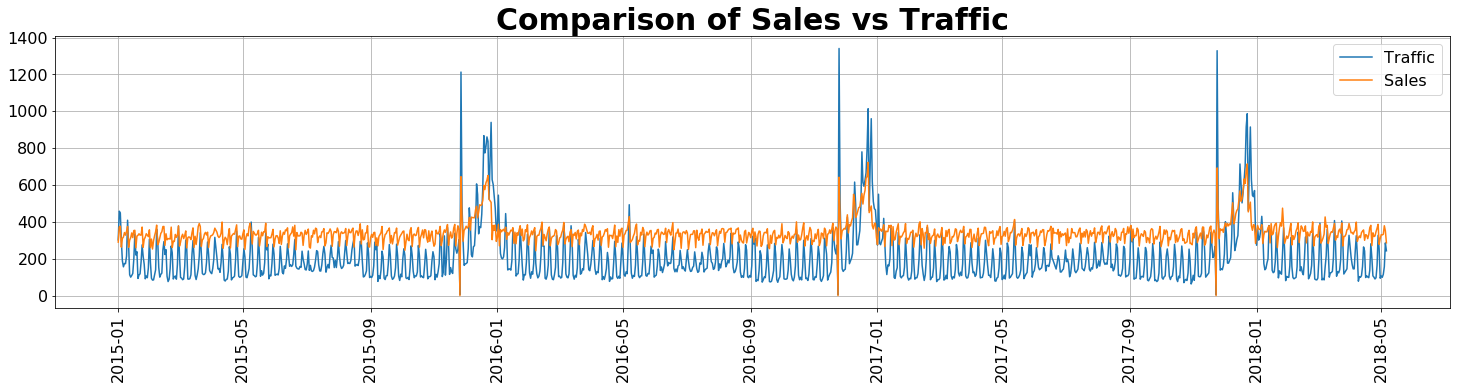

In [59]:
fig= plt.figure(figsize=(25,5))
plt.plot(traffic_eda['Date'].dt.date[(traffic_eda['Date'].dt.date).isin(traffic['Date'].dt.date)],traffic_eda['Traffic'][(traffic_eda['Date'].dt.date).isin(traffic['Date'].dt.date)])
plt.plot(sales_eda['Date'].dt.date[(sales_eda['Date'].dt.date).isin(traffic['Date'].dt.date)],sales_eda['Sales'][(sales_eda['Date'].dt.date).isin(traffic['Date'].dt.date)]/100)
plt.title("Comparison of Sales vs Traffic",fontsize=30 ,weight='bold')
plt.xticks(fontsize=16, rotation=90)
plt.yticks(fontsize=16)
plt.grid()
plt.legend(fontsize=16)

#Inference: We can see there is a direct correlation between Sales and Traffic.

# Merge sales and Traffic Data and analyze sales and traffic for common date and time

In [60]:
sales_df=newsales[(newsales['Date']).isin(newtraffic['Date'])]
sales_df.shape

(50011, 2)

In [61]:
traffic_df=newtraffic[(newtraffic['Date']).isin(sales_df['Date'])]
traffic_df.shape

(50011, 2)

In [62]:
combine_df=pd.merge(sales_df,traffic_df,on=sales_df['Date'],how='inner')


In [63]:
combine_df.columns=['drop','Date','Sales','Sales_Date','Traffic']
combine_df.head()

,drop,Date,Sales,Sales_Date,Traffic
0,2015-01-01 10:15:00,2015-01-01 10:15:00,662,2015-01-01 10:15:00,1
1,2015-01-01 10:30:00,2015-01-01 10:30:00,740,2015-01-01 10:30:00,4
2,2015-01-01 10:45:00,2015-01-01 10:45:00,655,2015-01-01 10:45:00,3
3,2015-01-01 11:00:00,2015-01-01 11:00:00,751,2015-01-01 11:00:00,1
4,2015-01-01 11:15:00,2015-01-01 11:15:00,730,2015-01-01 11:15:00,2


In [64]:
combine_df=combine_df.drop(['drop','Sales_Date'],axis=1)


In [65]:
combine_df.head()

,Date,Sales,Traffic
0,2015-01-01 10:15:00,662,1
1,2015-01-01 10:30:00,740,4
2,2015-01-01 10:45:00,655,3
3,2015-01-01 11:00:00,751,1
4,2015-01-01 11:15:00,730,2


# Was there traffic when there was no sale?

In [66]:
combine_df[combine_df['Sales']==0]
#Inference, most of these are holidays except on August 13,2017 but that was only at that particular time

,Date,Sales,Traffic
3782,2015-04-05 00:00:00,0,0
13255,2015-11-26 00:00:00,0,1
14640,2015-12-25 00:00:00,0,0
18409,2016-03-27 00:00:00,0,0
28131,2016-11-24 00:00:00,0,0
29606,2016-12-25 00:00:00,0,0
34147,2017-04-16 00:00:00,0,0
38997,2017-08-13 17:15:00,0,9
44553,2017-12-25 00:00:00,0,0
48570,2018-04-01 00:00:00,0,0


# Was there sale when there was no traffic?

In [76]:
combine_df[combine_df['Traffic']==0]
print("Number of days when there was sale with no traffic: ",len((combine_df[combine_df['Traffic']==0]).groupby(combine_df['Date'].dt.date).sum()))

Number of days when there was sale with no traffic:  849


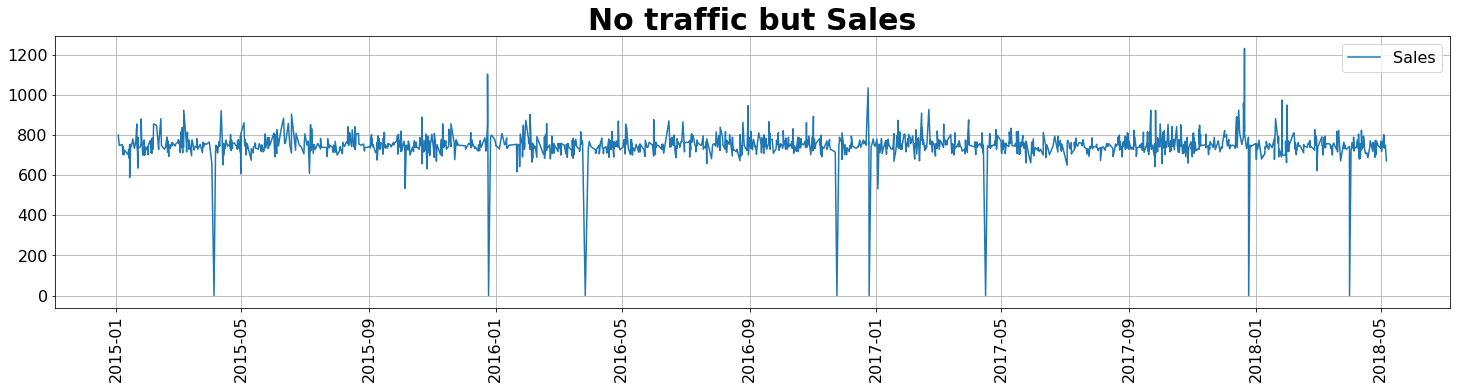

In [77]:
fig= plt.figure(figsize=(25,5))
plt.plot(combine_df['Date'][combine_df['Traffic']==0],combine_df['Sales'][combine_df['Traffic']==0])
plt.title("No traffic but Sales",fontsize=30 ,weight='bold')
plt.xticks(fontsize=16, rotation=90)
plt.yticks(fontsize=16)
plt.grid()
plt.legend(fontsize=16)

# Comparision of Sales vs traffic vs Sales when there was no traffic

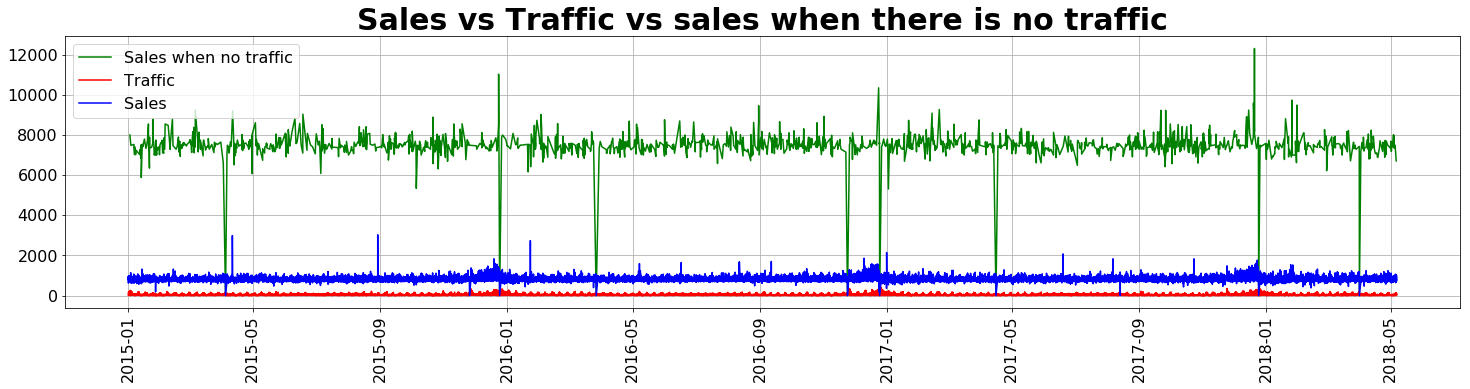

In [78]:
fig= plt.figure(figsize=(25,5))
plt.plot(combine_df['Date'][combine_df['Traffic']==0],combine_df['Sales'][combine_df['Traffic']==0]*10,color='green')
plt.plot(combine_df['Date'],combine_df['Traffic']*10,color='red')
plt.plot(combine_df['Date'],combine_df['Sales'],color='blue')
plt.title("Sales vs Traffic vs sales when there is no traffic",fontsize=30 ,weight='bold')
plt.xticks(fontsize=16, rotation=90)
plt.yticks(fontsize=16)
plt.grid()
plt.legend(('Sales when no traffic','Traffic','Sales'),fontsize=16)

# Data Augmentation

In [79]:
#Function to extract day of week,month,date, year from date field
def convert_date(df):
    
    df['Week_day']=df['Date'].dt.dayofweek
    df['Month']=df['Date'].dt.month
    df['Day']=df['Date'].dt.day
    df['Year']=df['Date'].dt.year
    
convert_date(combine_df)

In [80]:
#Function to convert date into numeric 
combine_df['date_delta'] = (combine_df['Date'] - combine_df['Date'].min())  / np.timedelta64(1,'D')

In [81]:
combine_df.head()

,Date,Sales,Traffic,Week_day,Month,Day,Year,date_delta
0,2015-01-01 10:15:00,662,1,3,1,1,2015,0.000000
1,2015-01-01 10:30:00,740,4,3,1,1,2015,0.010417
2,2015-01-01 10:45:00,655,3,3,1,1,2015,0.020833
3,2015-01-01 11:00:00,751,1,3,1,1,2015,0.031250
4,2015-01-01 11:15:00,730,2,3,1,1,2015,0.041667


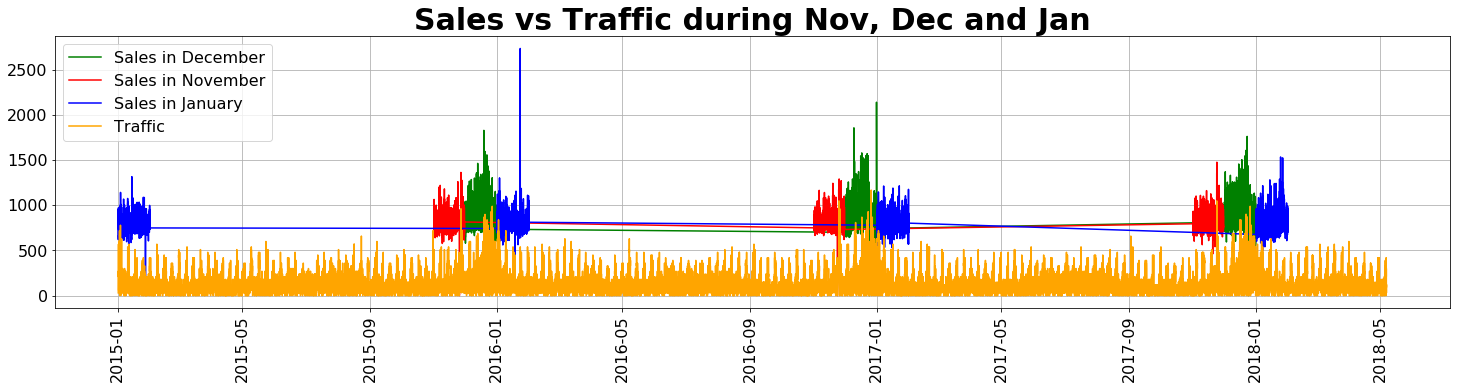

In [82]:
fig= plt.figure(figsize=(25,5))

plt.plot(combine_df['Date'][combine_df['Month']==12],combine_df['Sales'][combine_df['Month']==12],color='green')
plt.plot(combine_df['Date'][combine_df['Month']==11],combine_df['Sales'][combine_df['Month']==11],color='red')
plt.plot(combine_df['Date'][combine_df['Month']==1],combine_df['Sales'][combine_df['Month']==1],color='blue')

plt.plot(combine_df['Date'],combine_df['Traffic']*30,color='orange')
plt.title("Sales vs Traffic during Nov, Dec and Jan",fontsize=30 ,weight='bold')
plt.xticks(fontsize=16, rotation=90)
plt.yticks(fontsize=16)
plt.grid()
plt.legend(('Sales in December','Sales in November','Sales in January','Traffic'),fontsize=16)

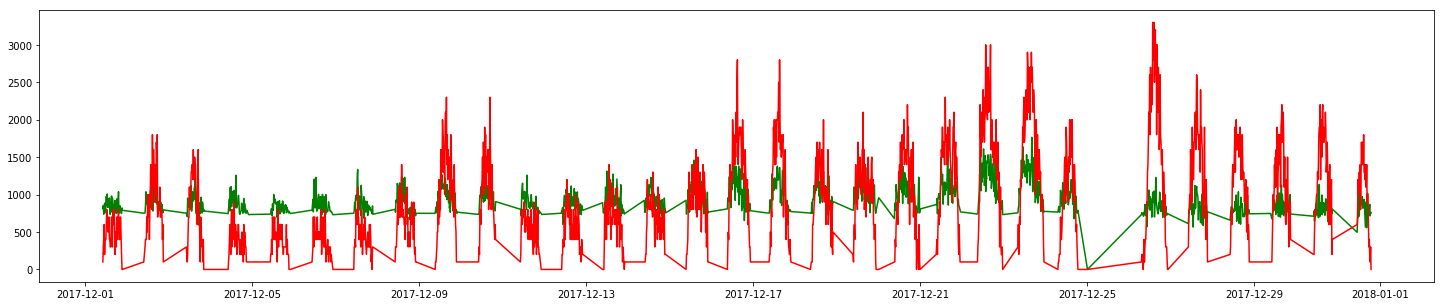

In [113]:
fig= plt.figure(figsize=(25,5))

plt.plot(combine_df['Date'][(combine_df['Month']==12)&(combine_df['Year']==2017)],combine_df['Sales'][(combine_df['Month']==12)&(combine_df['Year']==2017)],color='green')
plt.plot(combine_df['Date'][(combine_df['Month']==12)&(combine_df['Year']==2017)],combine_df['Traffic'][(combine_df['Month']==12)&(combine_df['Year']==2017)]*100,color='red')

In [114]:
#Inference: Taking a closer look at nly the december month sales and traffic, 
#we can see traffic always peaks on the day after christmas.

# Pick the common dates that were missing in Sales and Traffic data

In [83]:
miss_days=[]
for i in missing_dates_list:
    #print(i)
    if ((i) in (missing_traffic_list)):
        miss_days.append(i)
print(miss_days)
#These are easter and christmas days in 2015 to 2018


[Timestamp('2015-04-05 00:00:00'), Timestamp('2015-12-25 00:00:00'), Timestamp('2016-03-27 00:00:00'), Timestamp('2016-12-25 00:00:00'), Timestamp('2017-04-16 00:00:00'), Timestamp('2017-12-25 00:00:00'), Timestamp('2018-04-01 00:00:00')]


# Create a new Leave column for holidays

In [84]:
combine_df.loc[(combine_df['Date']).isin(miss_days),'Leave'] = 1 
combine_df.loc[np.logical_not((combine_df['Date']).isin(miss_days)),'Leave'] = 0

In [85]:
combine_df.loc[(combine_df['Date']).isin(miss_days)]

,Date,Sales,Traffic,Week_day,Month,Day,Year,date_delta,Leave
3782,2015-04-05,0,0,6,4,5,2015,93.572917,1.0
14640,2015-12-25,0,0,4,12,25,2015,357.572917,1.0
18409,2016-03-27,0,0,6,3,27,2016,450.572917,1.0
29606,2016-12-25,0,0,6,12,25,2016,723.572917,1.0
34147,2017-04-16,0,0,6,4,16,2017,835.572917,1.0
44553,2017-12-25,0,0,0,12,25,2017,1088.572917,1.0
48570,2018-04-01,0,0,6,4,1,2018,1185.572917,1.0


# Is the peak in sales and traffic around Christmas and Thanksgiving?

In [86]:
#select chirtmas dates from missing days list
christmas=[]
for i in miss_days:
    t=i.to_pydatetime()
    if (t.month==12):
        christmas.append(i)

In [87]:
#select twenty days before christmas exclusing the day of christmas to analyze sales and traffic
holidays=[]
count=range(0,20)

for i in christmas:
    for c in count:
        date=i+timedelta(days=(-c))
        if (date!=i):
            holidays.append(date)

In [88]:
len(holidays)

57

In [89]:
holidays_season=pd.DataFrame({'Date':holidays})
holidays_season['Date']=pd.to_datetime(holidays_season['Date'], errors='coerce')

# Create a new column for holidays season

In [90]:
#create a
combine_df.loc[(combine_df['Date'].dt.date).isin(holidays_season['Date'].dt.date),'Holiday_Season'] = 1 
combine_df.loc[np.logical_not((combine_df['Date'].dt.date).isin(holidays_season['Date'].dt.date)),'Holiday_Season'] = 0

In [91]:
combine_df['Leave'].value_counts()

0.0    50004
1.0        7
Name: Leave, dtype: int64

In [92]:
combine_df['Holiday_Season'].value_counts()

0.0    47080
1.0     2931
Name: Holiday_Season, dtype: int64

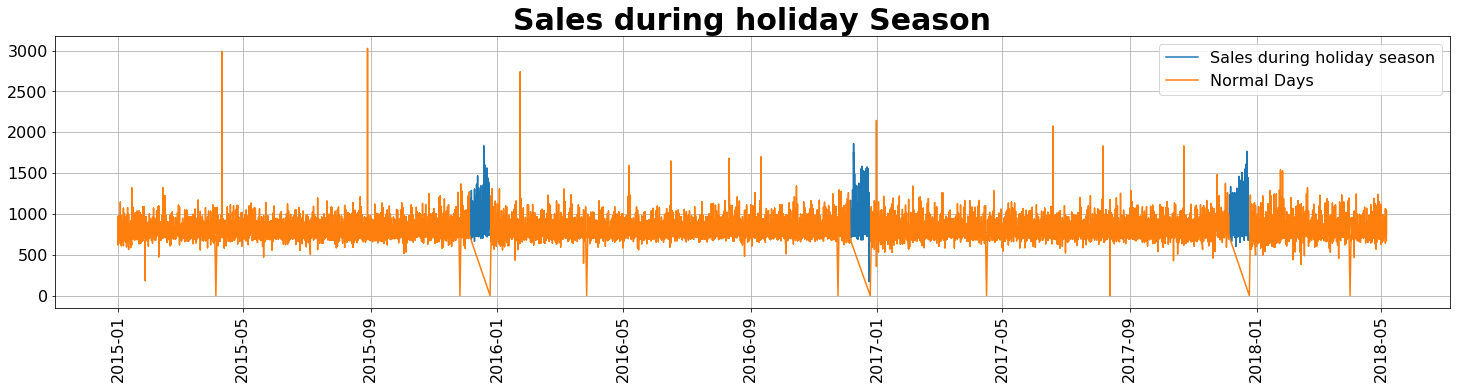

In [93]:
fig= plt.figure(figsize=(25,5))
plt.plot(combine_df['Date'].dt.date[(combine_df['Date'].dt.date).isin(holidays_season['Date'].dt.date)],combine_df['Sales'][(combine_df['Date'].dt.date).isin(holidays_season['Date'].dt.date)])

plt.plot(combine_df['Date'].dt.date[np.logical_not((combine_df['Date'].dt.date).isin(holidays_season['Date'].dt.date))],combine_df['Sales'][np.logical_not((combine_df['Date'].dt.date).isin(holidays_season['Date'].dt.date))])

plt.title("Sales during holiday Season",fontsize=30 ,weight='bold')
plt.xticks(fontsize=16, rotation=90)
plt.yticks(fontsize=16)
plt.grid()
plt.legend(('Sales during holiday season','Normal Days'),fontsize=16)

#Inference: Clearly we can see the peaks in sales and traffic is between thanksgiving and christmas

# Further Analysis by Discretizing Sales and Traffic

In [94]:
#discretizing data for Traffic
combine_df['Traffic_Range']=pd.cut(combine_df['Traffic'],[-1,0,1,2,3,4,5,6,7,8,9,10,15,40],
                         labels=["No Traffic","1","2","3","4","5","6","7","8","9","10","11 to 15","More than 15"])

In [95]:
combine_df['Traffic_Range'].value_counts()

2               8496
3               8113
4               6437
1               6172
6               3707
5               3145
11 to 15        3134
7               2734
8               2019
No Traffic      1729
9               1678
More than 15    1345
10              1302
Name: Traffic_Range, dtype: int64

In [96]:
#discretizing data for Sales
combine_df['Sales_Range']=pd.cut(combine_df['Sales'],[-1,1,725,750,775,800,825,850,900,950,3300],
                         labels=["No Sale","1-725","725-750","750-775","775-800","800-825","825-850","850-900","900-950","Sale >1000"])

In [97]:
combine_df['Sales_Range'].value_counts()

750-775       8616
775-800       7215
725-750       6620
850-900       5839
800-825       5770
825-850       4547
Sale >1000    4210
1-725         3962
900-950       3222
No Sale         10
Name: Sales_Range, dtype: int64

# Analysis by Time of the day

In [98]:
##Create new list to extract the hour and minutes information from Timestamp field
hours=[]
for i in combine_df['Date']:
    t=i.to_pydatetime()
    hours.append(t.hour)
minutes=[]
for i in combine_df['Date']:
    t=i.to_pydatetime()
    minutes.append(t.minute)
    
    
combine_df['Minute']=minutes
combine_df['Hour']=hours

In [99]:
combine_df.head(10)

,Date,Sales,Traffic,Week_day,Month,Day,Year,date_delta,Leave,Holiday_Season,Traffic_Range,Sales_Range,Minute,Hour
0,2015-01-01 10:15:00,662,1,3,1,1,2015,0.000000,0.0,0.0,1,1-725,15,10
1,2015-01-01 10:30:00,740,4,3,1,1,2015,0.010417,0.0,0.0,4,725-750,30,10
2,2015-01-01 10:45:00,655,3,3,1,1,2015,0.020833,0.0,0.0,3,1-725,45,10
3,2015-01-01 11:00:00,751,1,3,1,1,2015,0.031250,0.0,0.0,1,750-775,0,11
4,2015-01-01 11:15:00,730,2,3,1,1,2015,0.041667,0.0,0.0,2,725-750,15,11
5,2015-01-01 11:30:00,810,5,3,1,1,2015,0.052083,0.0,0.0,5,800-825,30,11
6,2015-01-01 11:45:00,780,6,3,1,1,2015,0.062500,0.0,0.0,6,775-800,45,11
7,2015-01-01 12:00:00,729,7,3,1,1,2015,0.072917,0.0,0.0,7,725-750,0,12
8,2015-01-01 12:15:00,933,7,3,1,1,2015,0.083333,0.0,0.0,7,900-950,15,12
9,2015-01-01 12:30:00,620,5,3,1,1,2015,0.093750,0.0,0.0,5,1-725,30,12


# Sales by Hour

(array([-500.,    0.,  500., 1000., 1500., 2000., 2500., 3000., 3500.]),
 <a list of 9 Text yticklabel objects>)

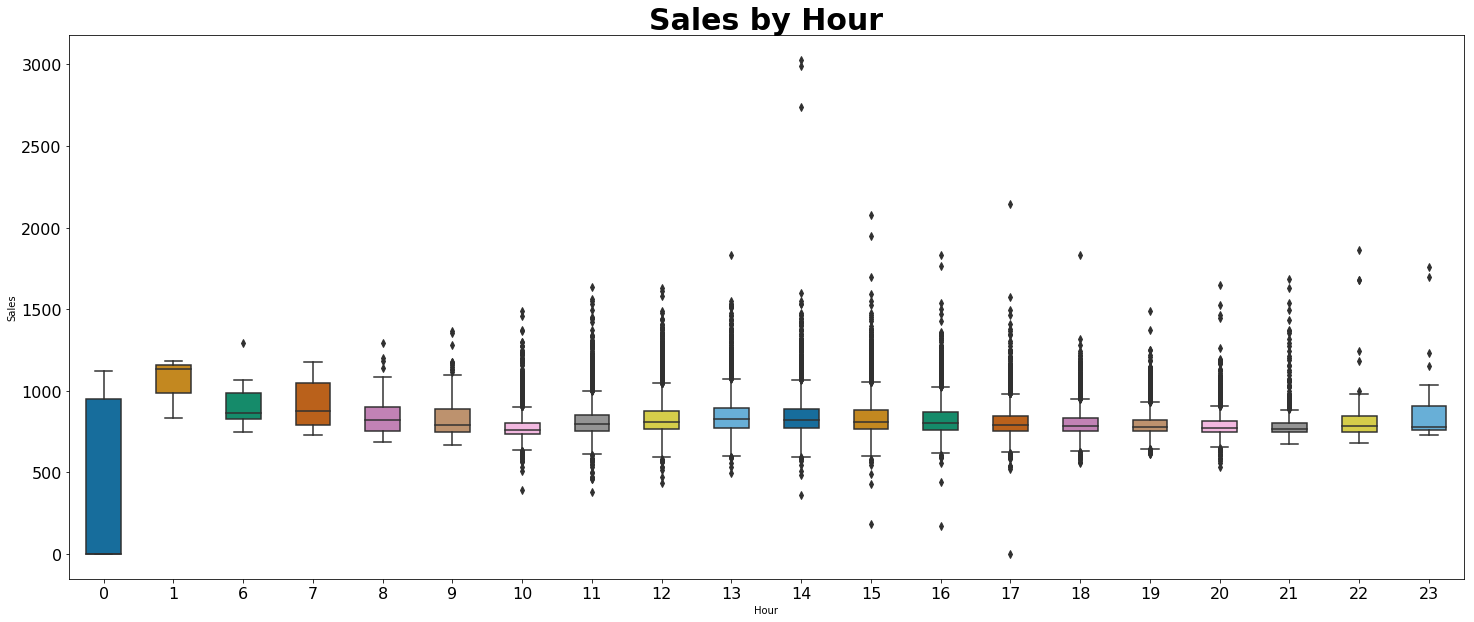

In [100]:
import seaborn as sns
fig, ax = plt.subplots(figsize=(25,10))
bplot = sns.boxplot(y='Sales', x='Hour', 
                 data=combine_df, 
                 width=0.5,
                 palette="colorblind"
                  )
plt.title("Sales by Hour",fontsize=30 ,weight='bold')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
#Inference:Maximum sale happened early morning 1:00 am compared to other hours.

# Traffic by Hour

(array([-5.,  0.,  5., 10., 15., 20., 25., 30., 35., 40., 45.]),
 <a list of 11 Text yticklabel objects>)

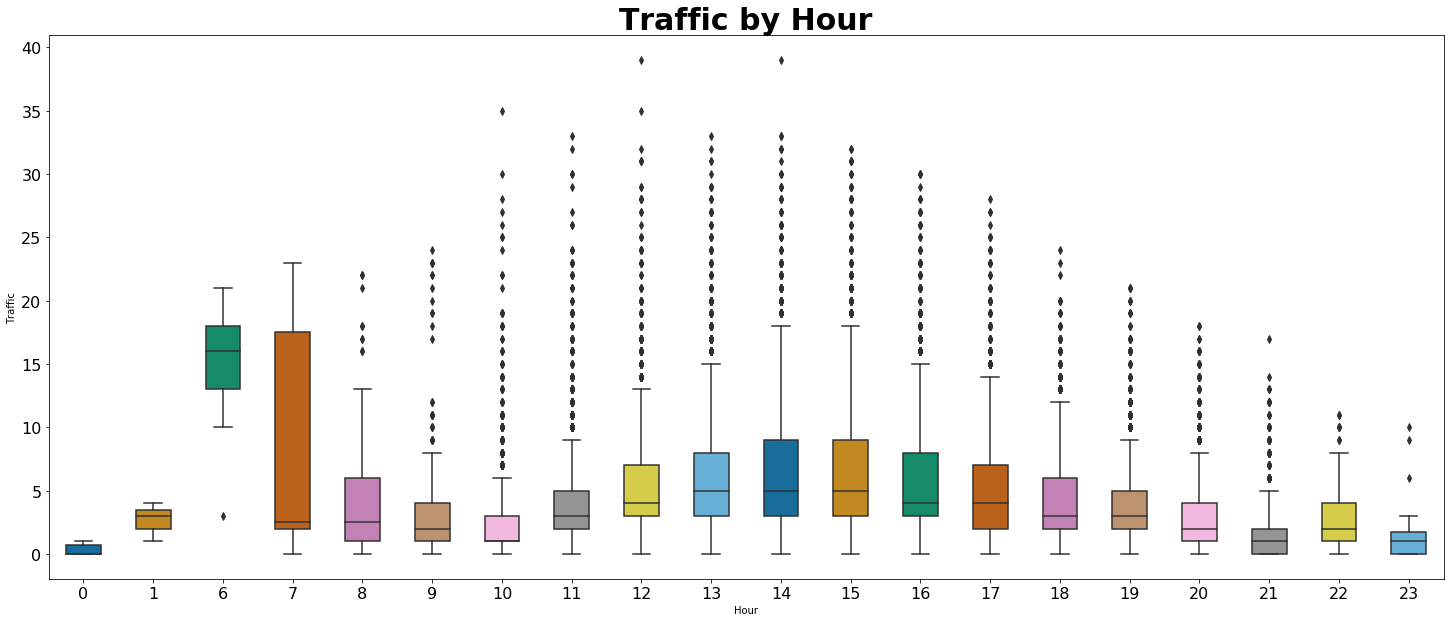

In [101]:
import seaborn as sns
fig, ax = plt.subplots(figsize=(25,10))
bplot = sns.boxplot(y='Traffic', x='Hour', 
                 data=combine_df, 
                 width=0.5,
                 palette="colorblind",
                   )
plt.title("Traffic by Hour",fontsize=30 ,weight='bold')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
#Inference: Traffic was peak in early morning 6 :00 a.m and 
#there were lot of variations if the number of customers visting at 7 :00 am

# Create a new column Quarter

In [102]:
combine_df.loc[(combine_df['Hour'])<=6,'Quarter'] = 1 
combine_df.loc[(combine_df['Hour']>6)&(combine_df['Hour']<=12),'Quarter'] = 2
combine_df.loc[(combine_df['Hour']>12)&(combine_df['Hour']<=18),'Quarter'] = 3
combine_df.loc[(combine_df['Hour']>18)&(combine_df['Hour']<=24),'Quarter'] = 4

(array([-5.,  0.,  5., 10., 15., 20., 25., 30., 35., 40., 45.]),
 <a list of 11 Text yticklabel objects>)

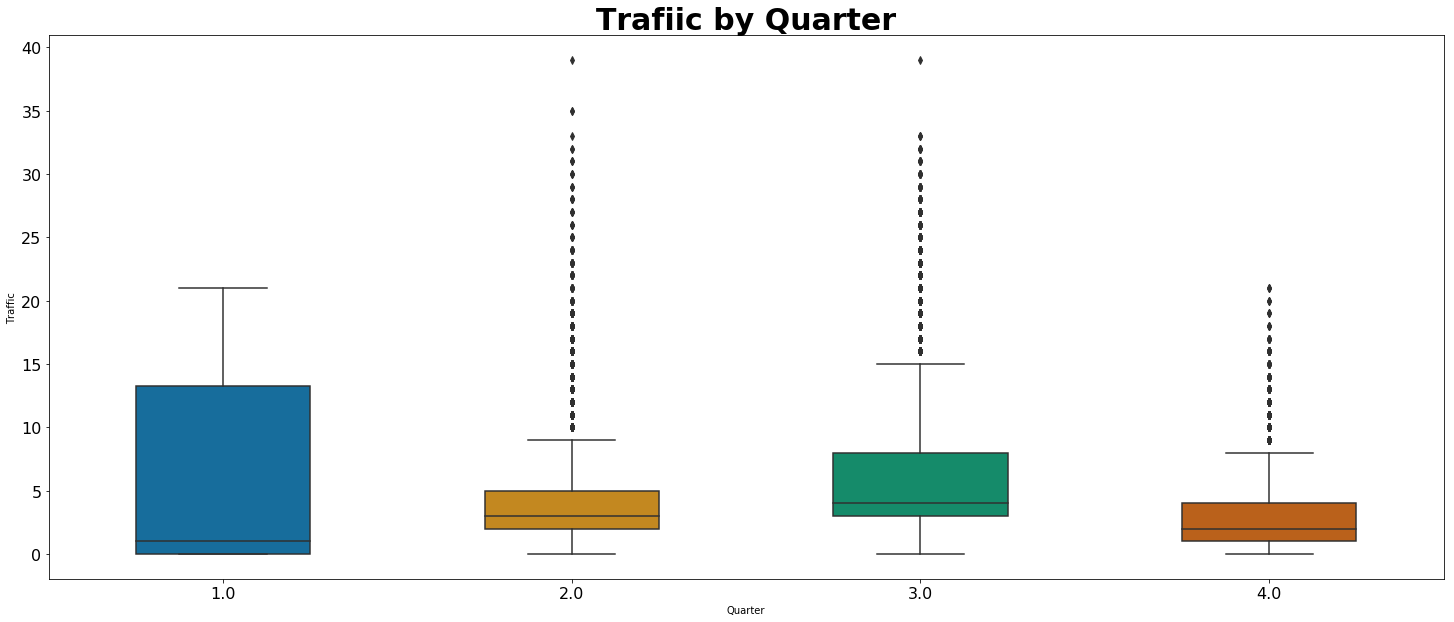

In [103]:
import seaborn as sns
fig, ax = plt.subplots(figsize=(25,10))
bplot = sns.boxplot(y='Traffic', x='Quarter', 
                 data=combine_df, 
                 width=0.5,
                 palette="colorblind",
                   )
plt.title("Trafiic by Quarter",fontsize=30 ,weight='bold')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
#Inference: We can the best sales happened during 1 and 3rd quater. 1st quarter than highest 3rd quantile and 
#whiskers but 3rd qunatile has the highest mean and most of its'values fallbetween 3 and 7.

(array([-500.,    0.,  500., 1000., 1500., 2000., 2500., 3000., 3500.]),
 <a list of 9 Text yticklabel objects>)

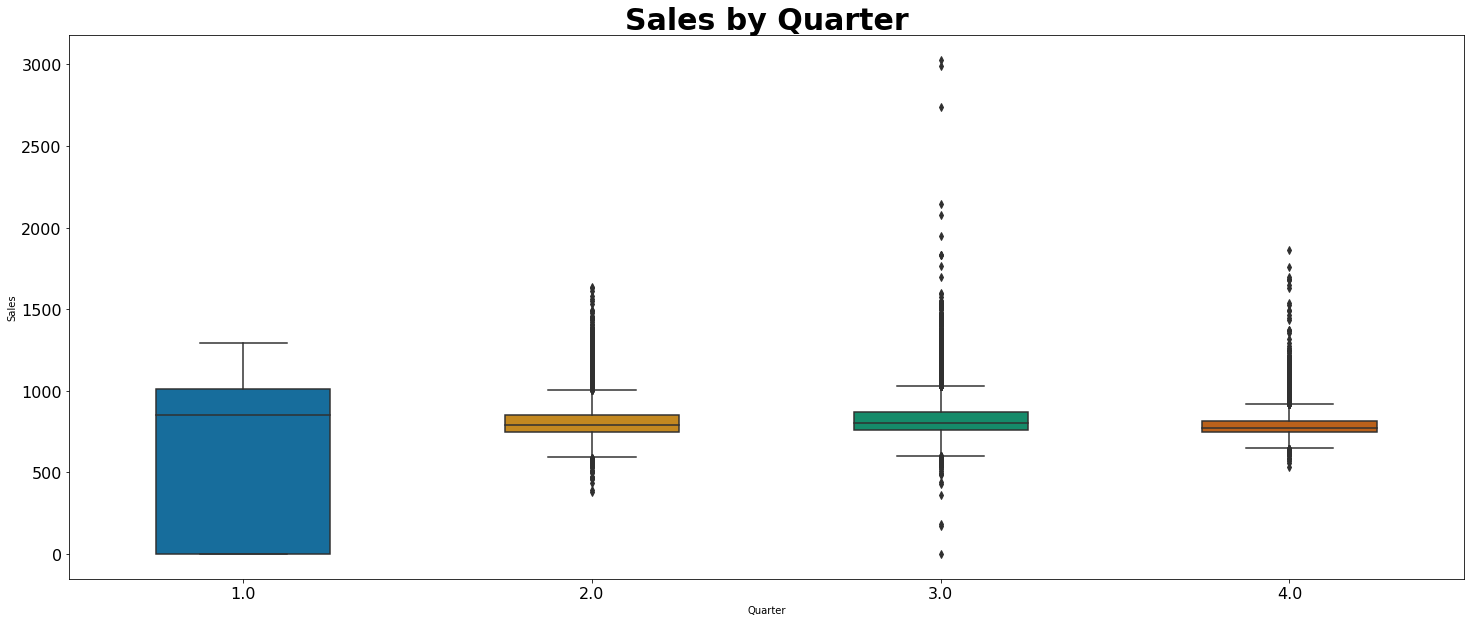

In [104]:
import seaborn as sns
fig, ax = plt.subplots(figsize=(25,10))
bplot = sns.boxplot(y='Sales', x='Quarter', 
                 data=combine_df, 
                 width=0.5,
                 palette="colorblind",
                   )
plt.title("Sales by Quarter",fontsize=30 ,weight='bold')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

#Inference: We can the best sales happened during 3rd quater since it has the highest 1st 
#and 3rd quantile and also highest mean.

In [105]:
combine_df.to_csv("~/Desktop/combinedf.csv")

In [106]:
combine_df

,Date,Sales,Traffic,Week_day,Month,Day,Year,date_delta,Leave,Holiday_Season,Traffic_Range,Sales_Range,Minute,Hour,Quarter
0,2015-01-01 10:15:00,662,1,3,1,1,2015,0.000000,0.0,0.0,1,1-725,15,10,2.0
1,2015-01-01 10:30:00,740,4,3,1,1,2015,0.010417,0.0,0.0,4,725-750,30,10,2.0
2,2015-01-01 10:45:00,655,3,3,1,1,2015,0.020833,0.0,0.0,3,1-725,45,10,2.0
3,2015-01-01 11:00:00,751,1,3,1,1,2015,0.031250,0.0,0.0,1,750-775,0,11,2.0
4,2015-01-01 11:15:00,730,2,3,1,1,2015,0.041667,0.0,0.0,2,725-750,15,11,2.0
5,2015-01-01 11:30:00,810,5,3,1,1,2015,0.052083,0.0,0.0,5,800-825,30,11,2.0
6,2015-01-01 11:45:00,780,6,3,1,1,2015,0.062500,0.0,0.0,6,775-800,45,11,2.0
7,2015-01-01 12:00:00,729,7,3,1,1,2015,0.072917,0.0,0.0,7,725-750,0,12,2.0
8,2015-01-01 12:15:00,933,7,3,1,1,2015,0.083333,0.0,0.0,7,900-950,15,12,2.0
9,2015-01-01 12:30:00,620,5,3,1,1,2015,0.093750,0.0,0.0,5,1-725,30,12,2.0
